# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [151]:
%pip install --upgrade plotly

## Import Statements

In [152]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

## Notebook Presentation

In [153]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [154]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv',parse_dates=['date'], encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [155]:
print(f'The shape of Household Income: {df_hh_income.shape}')
print(f'The shape of Pct_People_Below_Poverty_Level: {df_pct_poverty.shape}')
print(f'The shape of Pct_Over_25_Completed_High_School: {df_pct_completed_hs.shape}')
print(f'The shape of Share_of_Race_By_City: {df_share_race_city.shape}')
print(f'The shape of Deaths_by_Police_US: {df_fatalities.shape}')

The shape of Household Income: (29322, 3)
The shape of Pct_People_Below_Poverty_Level: (29329, 3)
The shape of Pct_Over_25_Completed_High_School: (29329, 3)
The shape of Share_of_Race_By_City: (29268, 7)
The shape of Deaths_by_Police_US: (2535, 14)


In [156]:
print(f'The Column Names in Household Income:{list(df_hh_income.columns)}\n')
print(f'The Column Names in Pct_People_Below_Poverty_Level:{list(df_pct_poverty.columns)}\n')
print(f'The Column Names in Pct_Over_25_Completed_High_School:{list(df_pct_completed_hs.columns)}\n')
print(f'The Column Names in Share_of_Race_By_City:{list(df_share_race_city.columns)}\n')
print(f'The Column Names in Deaths_by_Police_US:{list(df_fatalities.columns)}')

The Column Names in Household Income:['Geographic Area', 'City', 'Median Income']

The Column Names in Pct_People_Below_Poverty_Level:['Geographic Area', 'City', 'poverty_rate']

The Column Names in Pct_Over_25_Completed_High_School:['Geographic Area', 'City', 'percent_completed_hs']

The Column Names in Share_of_Race_By_City:['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

The Column Names in Deaths_by_Police_US:['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [157]:
print(f'In The Household Income There are {df_hh_income.isnull().sum().sum()} NaN values  and there are {df_hh_income.duplicated().sum().sum()} duplicates')
print(f'In The Pct_People_Below_Poverty_Level There are {df_pct_poverty.isnull().sum().sum()} NaN values  and there are {df_pct_poverty.duplicated().sum().sum()} duplicates')
print(f'In The Pct_Over_25_Completed_High_School There are {df_pct_completed_hs.isnull().sum().sum()} NaN values  and there are {df_pct_completed_hs.duplicated().sum().sum()} duplicates')
print(f'In The Share_of_Race_By_City There are {df_share_race_city.isnull().sum().sum()} NaN values  and there are {df_share_race_city.duplicated().sum().sum()} duplicates')
print(f'In The Deaths_by_Police_US There are {df_fatalities.isnull().sum().sum()} NaN values  and there are {df_fatalities.duplicated().sum().sum()} duplicates')


In The Household Income There are 51 NaN values  and there are 0 duplicates
In The Pct_People_Below_Poverty_Level There are 0 NaN values  and there are 0 duplicates
In The Pct_Over_25_Completed_High_School There are 0 NaN values  and there are 0 duplicates
In The Share_of_Race_By_City There are 0 NaN values  and there are 0 duplicates
In The Deaths_by_Police_US There are 346 NaN values  and there are 0 duplicates


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [158]:
df_hh_income = df_hh_income.fillna(0)
df_fatalities = df_fatalities.fillna(0)
df_pct_poverty = df_pct_poverty.fillna(0)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [159]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(str).str.replace('-', '0')

In [160]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

In [161]:
print (df_pct_poverty[pd.to_numeric(df_pct_poverty.poverty_rate, errors='coerce').isnull()])

Empty DataFrame
Columns: [Geographic Area, City, poverty_rate]
Index: []


In [162]:
poverty_by_state = df_pct_poverty.groupby(['Geographic Area']).agg({'poverty_rate':pd.Series.mean})

In [163]:
poverty_by_state.sort_values('poverty_rate', ascending=True, inplace=True)

In [164]:
poverty_by_state.head()

,poverty_rate
Geographic Area,
NJ,8.16
WY,9.06
CT,9.14
MA,9.55
MD,10.27


In [165]:
ho_bar = px.bar(
        x = poverty_by_state.poverty_rate,
        y = poverty_by_state.index,
        title='Poverty Rate in each US State',
        orientation = 'h',
        color=poverty_by_state.index,
        color_continuous_scale='Plasma')

ho_bar.update_layout(xaxis_title='Poverty Rate in each US State', 
                    yaxis_title='States Names',
                    coloraxis_showscale=False)

ho_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [166]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(str).str.replace('-', '0')
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs = df_pct_completed_hs.groupby(['Geographic Area']).agg({'percent_completed_hs':pd.Series.mean})
df_pct_completed_hs.sort_values('percent_completed_hs', ascending=True, inplace=True)

In [167]:
ho_bar = px.bar(
        x = df_pct_completed_hs.percent_completed_hs,
        y = df_pct_completed_hs.index,
        title='High School Graduation Rate by US State',
        orientation = 'h',
        color=df_pct_completed_hs.index,
        color_continuous_scale='Plasma')

ho_bar.update_layout(xaxis_title='High School Graduation Rate', 
                    yaxis_title='States Names',
                    coloraxis_showscale=False)

ho_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [168]:
pov_rate = poverty_by_state.sort_values('Geographic Area', ascending=True)
pc_compl_hc = df_pct_completed_hs.sort_values('Geographic Area', ascending=True)

Text(0, 0.5, 'High School Graduation Rate')

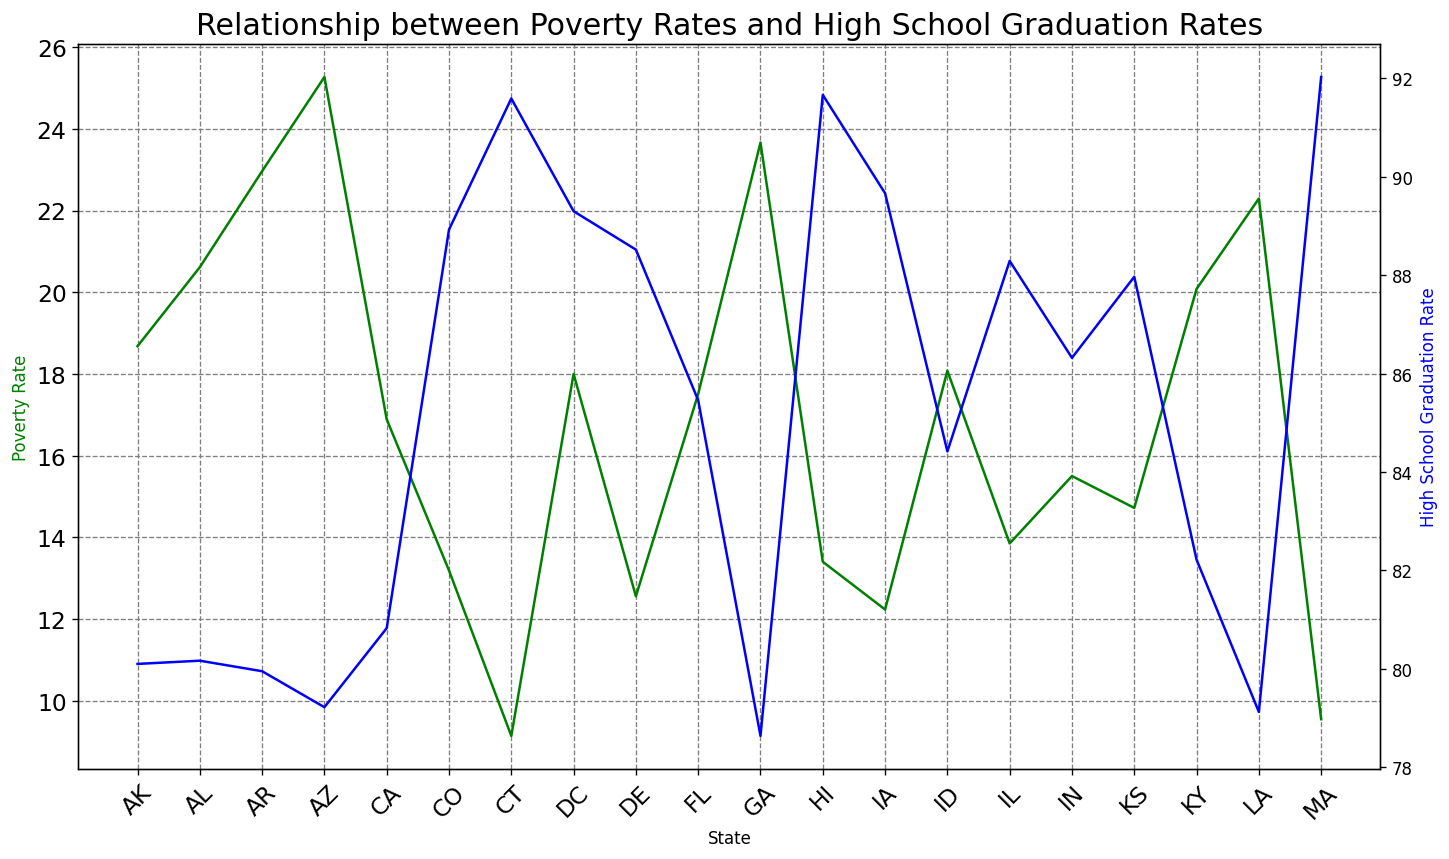

In [169]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Relationship between Poverty Rates and High School Graduation Rates', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Add styling
ax1.plot(pov_rate.index[:20], pov_rate.poverty_rate[:20], color='g')
ax2.plot(pc_compl_hc.index[:20], pc_compl_hc.percent_completed_hs[:20], 'b')

ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate', color='green')
ax2.set_ylabel('High School Graduation Rate', color='blue')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

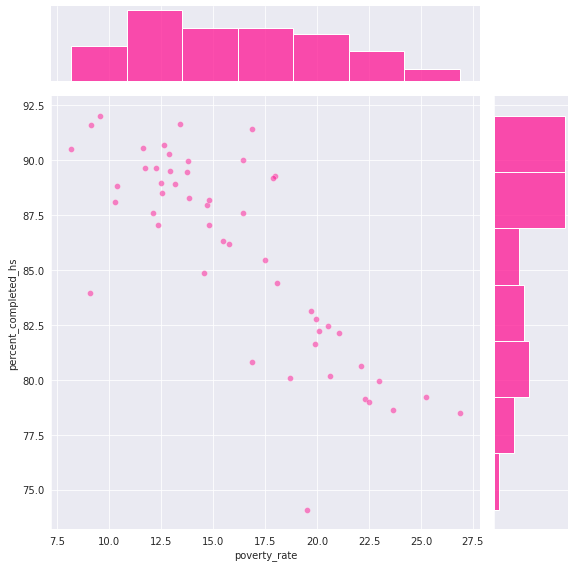

In [170]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=pov_rate['poverty_rate'], 
                y=pc_compl_hc['percent_completed_hs'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

In [171]:
joined_df = pd.merge(pov_rate, pc_compl_hc, how='inner', on='Geographic Area')

In [172]:
joined_df.head()

,poverty_rate,percent_completed_hs
Geographic Area,,
AK,18.68,80.10
AL,20.61,80.16
AR,22.96,79.95
AZ,25.27,79.22
CA,16.89,80.82


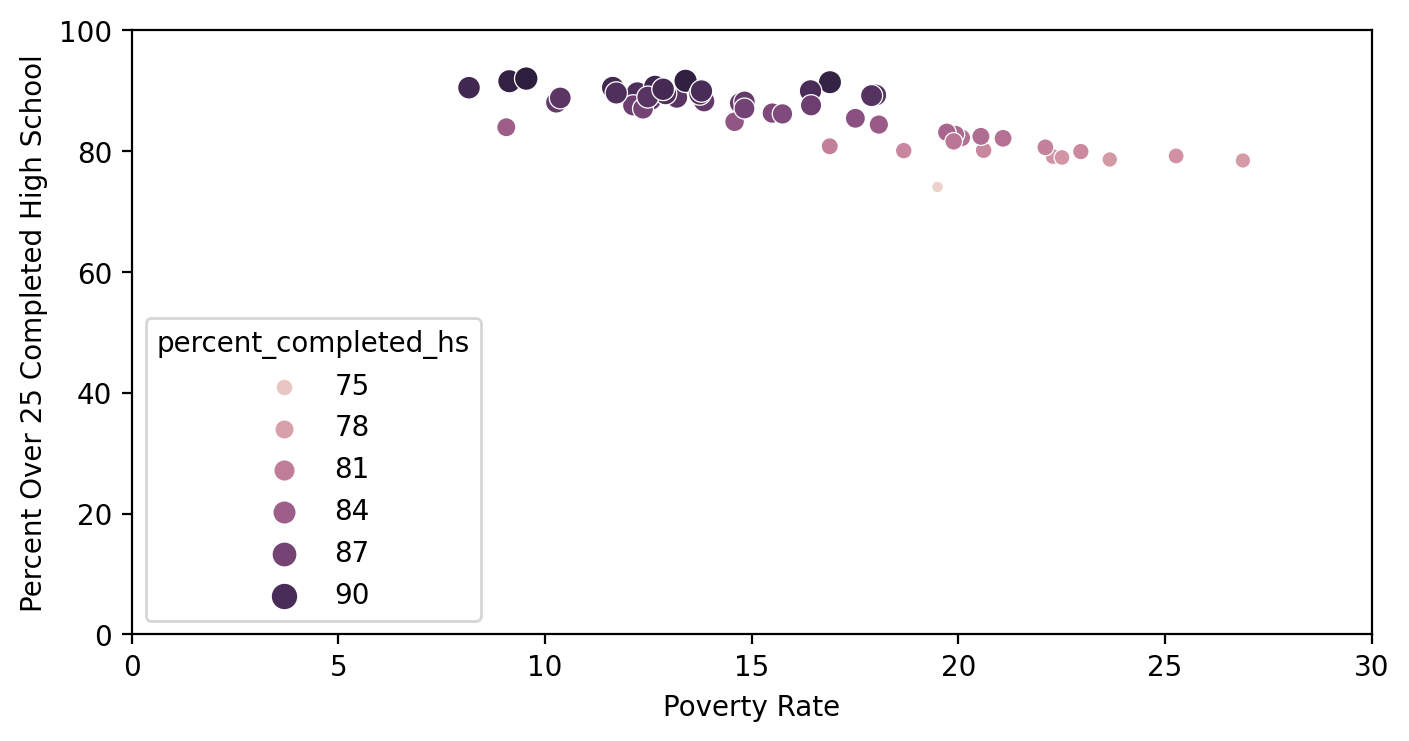

In [173]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=joined_df,
                     x='poverty_rate', 
                     y='percent_completed_hs',
                     hue='percent_completed_hs', # change colour
                     size='percent_completed_hs',) # change size of dot

ax.set(ylim=(0, 100),
       xlim=(0, 30),
       ylabel='Percent Over 25 Completed High School',
       xlabel='Poverty Rate',)

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

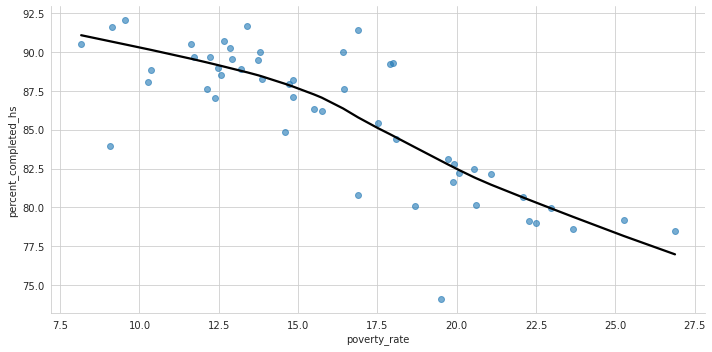

In [174]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=joined_df,
               x='poverty_rate', 
               y='percent_completed_hs',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [175]:
df_share_race_city = df_share_race_city.replace(['(X)'],'0')
df_share_race_city = df_share_race_city.replace(['(0)'],'0')

df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)
share_white = df_share_race_city.groupby(['Geographic area']).agg({'share_white':pd.Series.mean})

df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black)
share_black = df_share_race_city.groupby(['Geographic area']).agg({'share_black':pd.Series.mean})

df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american)
share_nat_americ = df_share_race_city.groupby(['Geographic area']).agg({'share_native_american':pd.Series.mean})

df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian)
share_asian = df_share_race_city.groupby(['Geographic area']).agg({'share_asian':pd.Series.mean})

df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic)
share_hispanic = df_share_race_city.groupby(['Geographic area']).agg({'share_hispanic':pd.Series.mean})


In [176]:
data_frames = [share_white, share_black.share_black, share_nat_americ, share_asian, share_hispanic]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Geographic area'],
                                            how='outer'), data_frames)

df_merged.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.26,0.56,45.48,1.38,2.13
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.54,2.68,1.72,5.54,29.51


In [177]:
fig = px.bar(df_merged,
             x=df_merged.index,
             y=df_merged.columns,
             title="Racial Makeup of Each US State (With Mean Values)")
fig.show()

# Create Donut Chart by of People Killed by Race



In [178]:
# Renaming Other values
df_fatalities.race = df_fatalities.race.astype(str).str.replace('O', "Nan")
df_fatalities.race = df_fatalities.race.astype(str).str.replace('0', "Nan")
df_fatalities.race = df_fatalities.race.astype(str).str.replace('Nan', "Other")


death_by_race = df_fatalities.race.value_counts()
#Deciphering column values
death_by_race.index = ['White', 'Black', 'Hispanic', 'Other', 'Asian', 'Native American']

# Showing Donut Chart
fig = px.pie(labels=death_by_race.index, 
             values=death_by_race.values,
             title="Percentage of People Killed by Race",
             names=death_by_race.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [179]:
mens_and_womans_deaths = df_fatalities.gender.value_counts()
mens_and_womans_deaths.index = ['Men', 'Women']

In [180]:
mens_and_womans_deaths

Men      2428
Women     107
Name: gender, dtype: int64

In [181]:
fig = px.pie(mens_and_womans_deaths, 
             values=mens_and_womans_deaths.values, 
             names=mens_and_womans_deaths.index, 
                          color_discrete_map={
                              'Men':'Blue',
                              'Women':'Red'},
             title='Total Number of Deaths of Men and Women')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

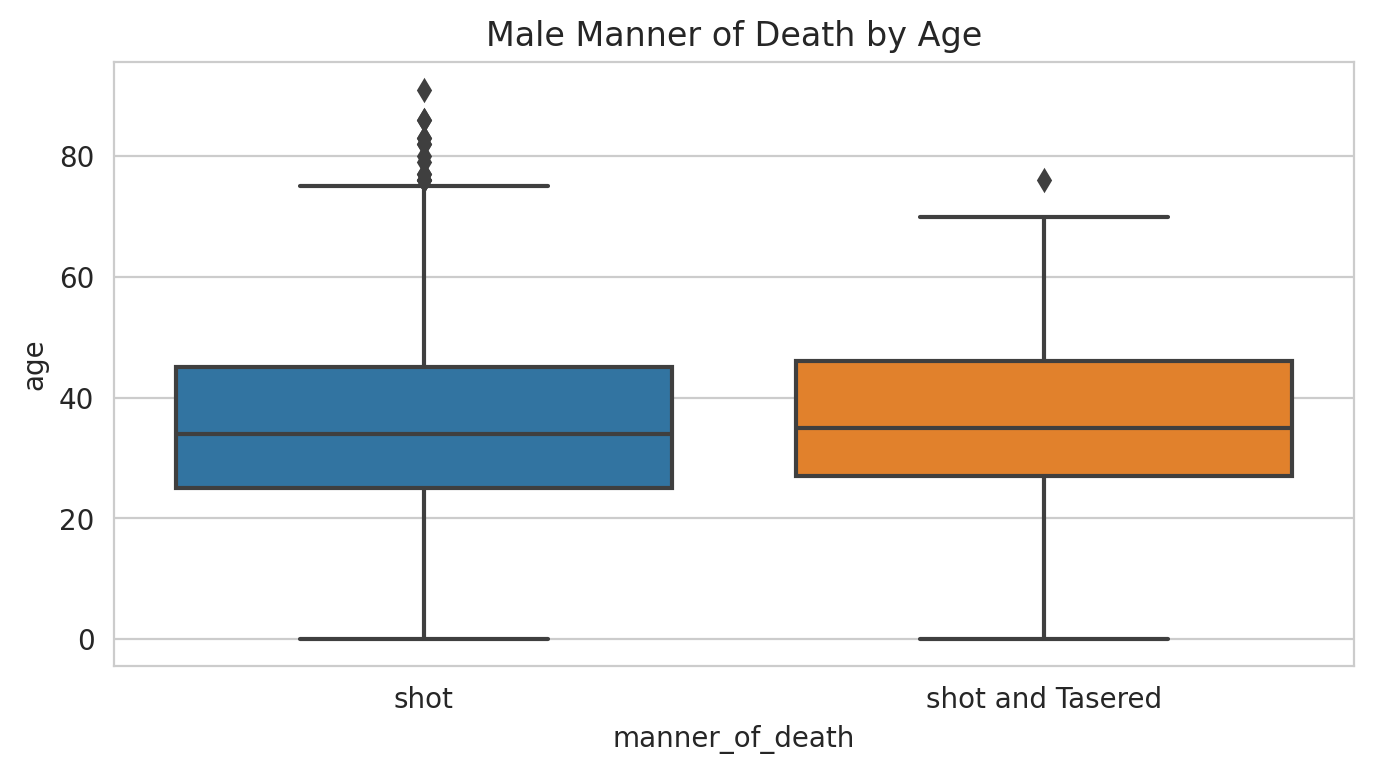

In [182]:
male = df_fatalities[df_fatalities.gender == 'M']
male = male[['gender','manner_of_death' ,'age']]
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=male,
                x='manner_of_death',
                y='age').set_title('Male Manner of Death by Age')

plt.show()

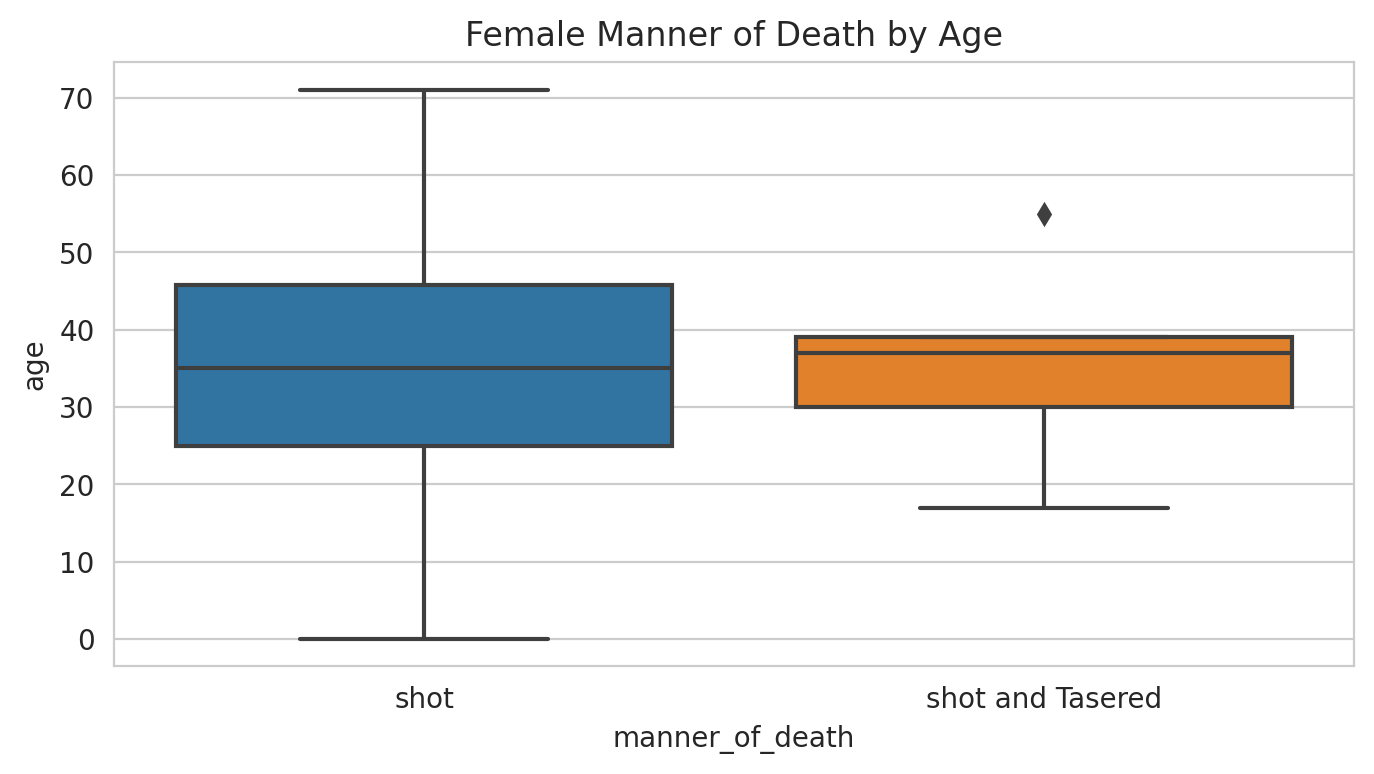

In [183]:
female = df_fatalities[df_fatalities.gender == 'F']
female = female[['gender','manner_of_death' ,'age']]
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=female,
                x='manner_of_death',
                y='age').set_title('Female Manner of Death by Age')

plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [184]:
pct_armed = df_fatalities.armed.value_counts()

In [185]:

fig = px.pie(labels=pct_armed.index, 
             values=pct_armed.values,
             title="Percentage of Armed People",
             names=pct_armed.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [186]:
qty_killed_under_25 = len(df_fatalities[df_fatalities.age <= 25])
qty_killed_over_25 = len(df_fatalities[df_fatalities.age >= 25])
pct = qty_killed_under_25 / (qty_killed_under_25 + qty_killed_over_25) * 100
print(f'Percentage of people killed were under 25 is {round(pct, 2)}%')


Percentage of people killed were under 25 is 23.88%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

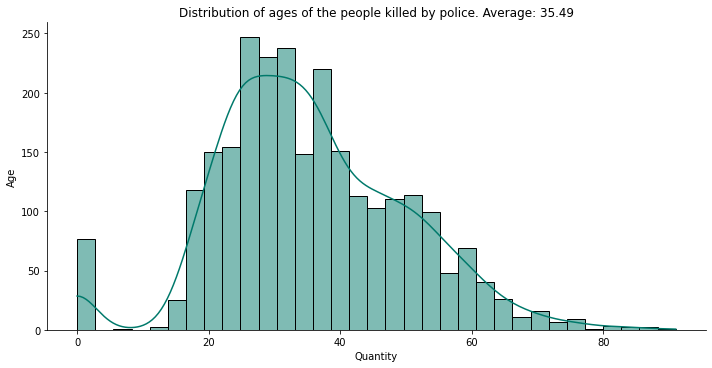

In [187]:
sns.displot(df_fatalities.age, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of ages of the people killed by police. Average: {df_fatalities.age.mean():.4}')
plt.xlabel('Quantity')
plt.ylabel('Age')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

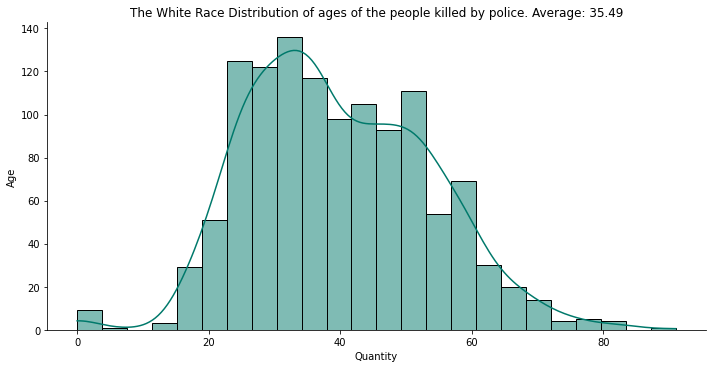

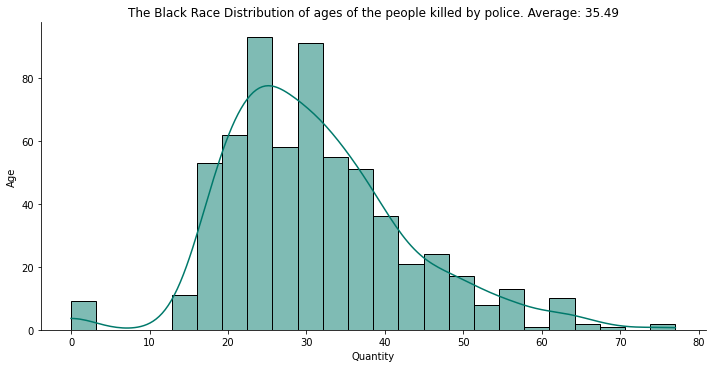

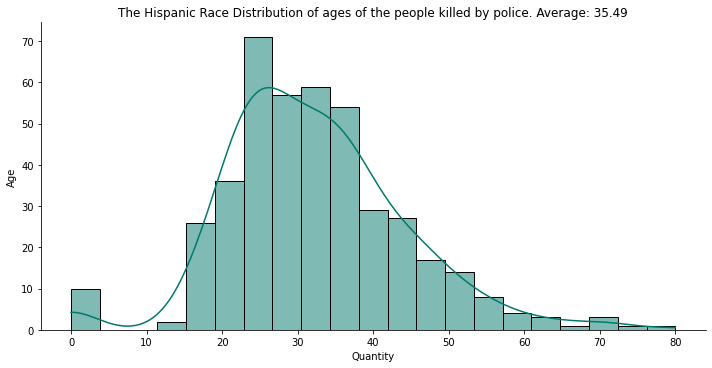

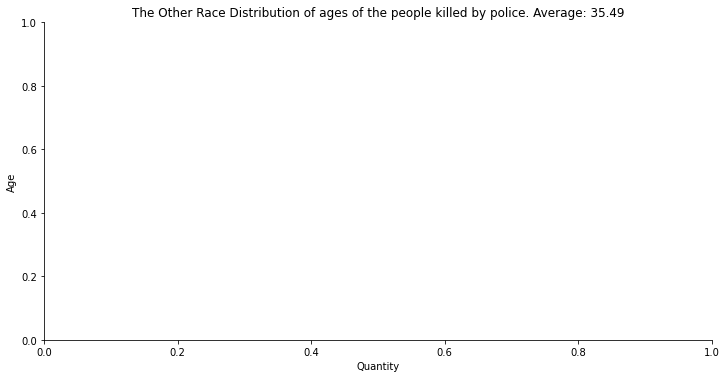

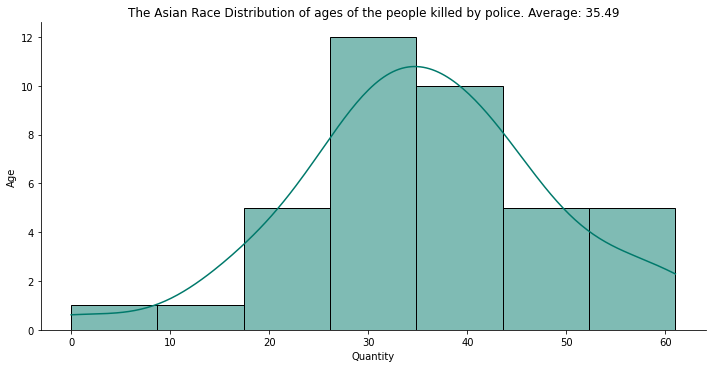

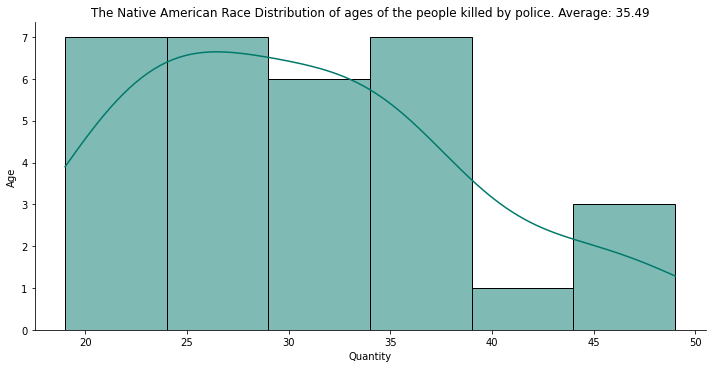

In [188]:
races_names = ['White', 'Black', 'Hispanic', 'Other', 'Asian', 'Native American']
races = ['W', 'B', 'H', 'O', 'A', 'N']

for race in races:
    data = df_fatalities[df_fatalities.race == f'{race}']
    sns.displot(data.age, 
            aspect=2,
            kde=True, 
            color='#00796b')
    
    #Selecting necessary race names
    race_name = races_names[races.index(f'{race}')]
    

    plt.title(f'The {race_name} Race Distribution of ages of the people killed by police. Average: {df_fatalities.age.mean():.4}')
    plt.xlabel('Quantity')
    plt.ylabel('Age')

    plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [189]:
death_by_race.index

Index(['White', 'Black', 'Hispanic', 'Other', 'Asian', 'Native American'], dtype='object')

In [190]:
    v_bar_split = px.bar(x = death_by_race.index,
                         y = death_by_race.values,
                         color = death_by_race.index,
                         title='Race of People Killed')
     
    v_bar_split.update_layout(xaxis_title='Race', 
                              yaxis_title='Quantity')
    v_bar_split.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [191]:
# Finding mentall ill 
qty_mental_ill_killed = len(df_fatalities[df_fatalities.signs_of_mental_illness == True])
# Calculating
total_killed = len(df_fatalities)
pct = qty_mental_ill_killed / (qty_mental_ill_killed + total_killed) * 100
print(f'\n Percentage of killed people who were mentally ill is {pct:.4}%')


 Percentage of killed people who were mentally ill is 19.98%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [192]:
# Grouping and sorting data
dangerous_cities = df_fatalities.groupby(['city']).agg({'id':pd.Series.count})
dangerous_cities.sort_values('id', ascending=False, inplace=True)
dangerous_cities.head(3)

,id
city,
Los Angeles,39
Phoenix,31
Houston,27


In [193]:
v_bar = px.bar(
        x = dangerous_cities.index[:10],
        y = dangerous_cities.id[:10],
        color = dangerous_cities.id[:10],
        color_continuous_scale='sunsetdark',
        title='Top 10 Cities with the most Police Killings')

v_bar.update_layout(xaxis_title='City', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Deaths')
v_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [194]:

race_by_city_calc = df_fatalities.groupby(['city', 'race'], 
                               as_index=False).agg({'id': pd.Series.count})
race_by_city_calc.sort_values(by='id', ascending=False, inplace=True)
merged_df = pd.merge(race_by_city_calc, dangerous_cities, on='city')
merged_df.sort_values(by='id_y',ascending=False ,inplace=True)

#Converting abbreviations for the words
merged_df.race = merged_df.race.astype(str).str.replace('W', 'White')
merged_df.race = merged_df.race.astype(str).str.replace('A', 'Asian')
merged_df.race = merged_df.race.astype(str).str.replace('N', 'Native American')
merged_df.race = merged_df.race.astype(str).str.replace('H', 'Hispanic')
merged_df.race = merged_df.race.astype(str).str.replace('B', 'Black')



races_names = ['White', 'Black', 'Hispanic', 'Other', 'Asian', 'Native American']

#Calculating share Percentage
share_pct = (merged_df.id_x / merged_df.id_y) * 100
merged_df.insert(4, 'share_pct', share_pct)
merged_df



,city,race,id_x,id_y,share_pct
4,Los Angeles,Hispanic,19,39,48.72
5,Los Angeles,Black,10,39,25.64
6,Los Angeles,White,6,39,15.38
7,Los Angeles,Other,3,39,7.69
8,Los Angeles,Asian,1,39,2.56
...,...,...,...,...,...
969,Riverdale,Black,1,1,100.00
970,River Forest,White,1,1,100.00
971,Rising Sun,White,1,1,100.00
972,Ridgefield,White,1,1,100.00


In [195]:
cat_cntry_bar = px.bar(x=merged_df.share_pct[:41],
                       y=merged_df.city[:41],
                       color=merged_df.race[:41],
                       orientation='h',
                       title='Racial Makeup of Cities with Top 10 Deaths')

cat_cntry_bar.update_layout(xaxis_title='% of race', 
                            yaxis_title='City')
cat_cntry_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [196]:
# Calculating number of deaths by state
most_dangerous_states = df_fatalities.groupby(['state'], 
                               as_index=False).agg({'id': pd.Series.count})


In [197]:
#Showing a Choropleth Map of Police Killings by US State
fig = px.choropleth(most_dangerous_states,
                    locations='state',
                    color='id',
                    color_continuous_scale='spectral_r',
                    hover_name='state',
                    locationmode='USA-states',
                    labels={'id':'Number of Killings by Police', 'state': 'State'},
                    scope='usa')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [198]:
# Sorting necessary data

df_fatalities['year'] = pd.DatetimeIndex(df_fatalities.date).year
fatal = df_fatalities.groupby(['year']).agg({'id':pd.Series.count})


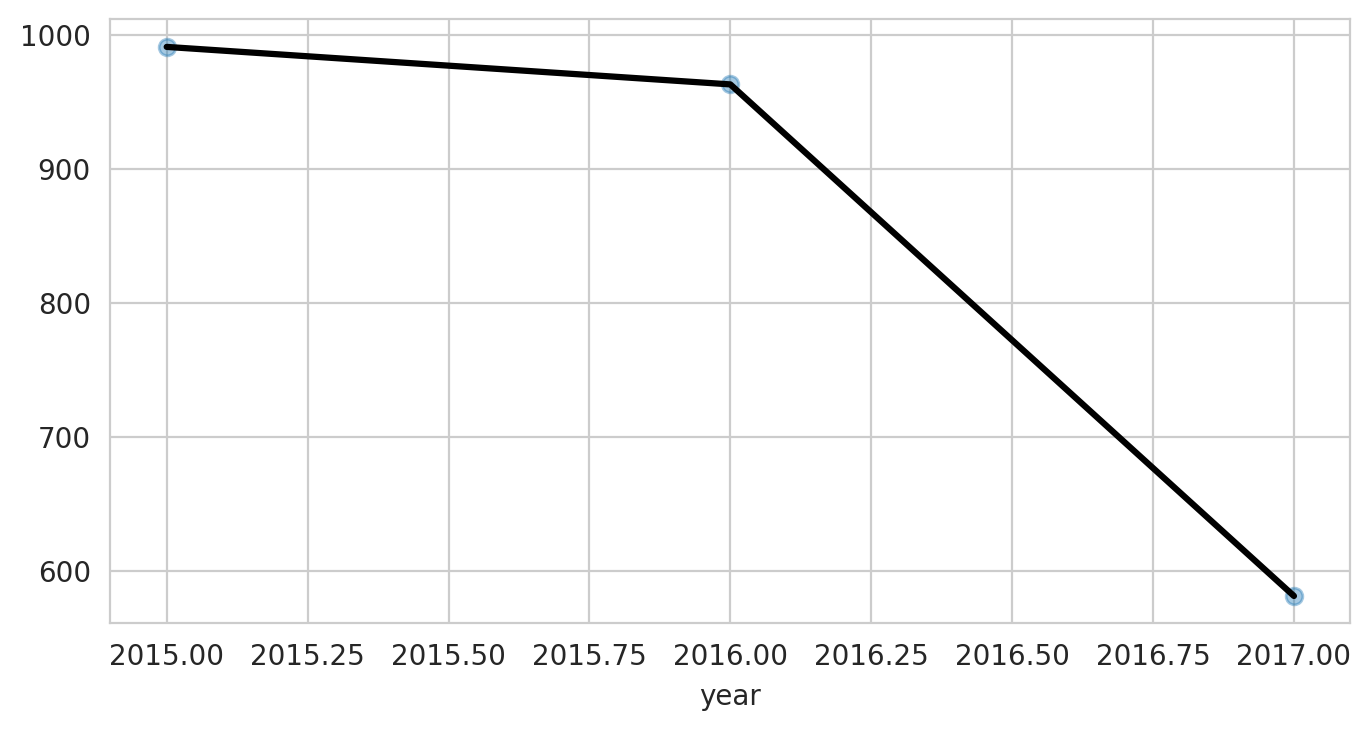

In [199]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=fatal,
                x=fatal.index,
                y=fatal.values,
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).